# Die Hausarbeit im Teilmodul Machine Learning

Vorgelegt von Delhin Sarhan (Matr.Nr.:1611724) & Illia Slutskyi (Matr.Nr.:1625539)

## 1 Einleitung

Die vorgelegte Hausarbeit beschäftigt sich mit der Lebenserwartung der Menschen in Jahren in den 150 verschiedenen UN-Staaten des verwendeten Datensatzes. Das Ziel dieser Hausarbeit ist es den Einfluss des Bildungsstandes auf die mittlere Lebenserwartung des jeweiligen Landes zu ermitteln. Als Kennzahl für den Bildungsstand wird der "Education Index" verwendet. Die möglichen Werte des Indexes schwanken zwischen 0 und 1 (näheres zum Education Index unter diesem [Link](https://en.wikipedia.org/wiki/Education_Index#:~:text=An%20Education%20index%20is%20a%20component%20of%20the,GDP%20per%20capita%20and%20life%20expectancy%20of%20countries.)). Je näher der Wert zur Zahl 1 ist, desto höher ist der Bildungsstand. Als Ergebnis wird ein Modell erstellt, welches vorhersagen soll, wie hoch die durchschnittliche Lebenserwartung einer Person in Abhängigkeit des Bildungsstandes in einem ausgewählten Land ist.

Beide Variablen wurden im Jahr 2019 erhoben.

## 2 Datensatz

### 2.1 Datenimport

Die sieben Bibliotheken (pandas, matplotlib, numpy, statsmodels, math, sklearn und scipy) werden für das spätere Vorgehen importiert. Die Bibliothek pandas wird für das Arbeiten mit den Daten verwendet, d.h. für den Import der Daten, das Berechnen der Kennzahlen und das Transformieren von Daten und/oder Tabellen. Matplotlib wird gebraucht, um die Daten zu visualisieren. Numpy wird importiert, damit das Arbeiten mit den Listen erleichtert wird. Die Bibliothek statsmodels wird benötigt, um die Modelle auszuwerten. Math ermöglicht eine vereinfachte Arbeit mit komplexen Zahlen, wie zum Beispiel mit π- oder mit e-Zahlen. Die Bibliothek sklearn erstellt die Modelle für das Machine Learning und scipy hilft dabei, die Daten zu interpretieren. Mit der letzten Zeile werden alle Abbildungen unter der Programmier-Zelle beim Öffnen des Notebooks angezeigt.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Um das Modell für die Vorhersage erstellen zu können,muss zunächst ein Datensatz gebildet werden. Der Datensatz heißt "ml_dataset.csv" und verfügt über drei Spalten und 189 Beobachtungsmerkmale. In der ersten Spalte "state" sind die betrachteten Länder aufgelistet; die zweite Spalte "life_expectancy" enthält die Lebenserwartungen in Jahren, welche bis zur ersten Nachkommastelle aufgerundet wird und die dritte Spalte "education_index" verfügt über den Bildungsindex mit Werten zwischen null und eins, welche bis zur dritten Nachkommastelle aufgerundet werden.

Der Datensatz wurde im CSV-Format programmiert/codiert und wird im Anschluss mit Pandas eingelesen/importiert. Da die Daten lokal gespeichert sind, ist es nötig, diese zunächst von der Bibliothek "google.colab" und ihrer Funktion "files" zu importieren. 

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving ml_dataset.csv to ml_dataset.csv


In [3]:
dataset = pd.read_csv('ml_dataset.csv', sep=';', encoding="ISO-8859-1")

### 2.2 Allgemeines zum Datensatz

Mithilfe der Biblipthek Pandas wurde die Spalte "state" zum Index der unten abgebildeten Tabelle. Damit sich die Spalte nicht doppelt, wurde diese im Code in der zweiten Zeile mit der drop-Methode gelöscht. Dementsrechend verfügt der Datensatz nur noch über zwei Spalten und den zuvor erwähnten 189 Zeilen. 

In [4]:
dataset.index = dataset['state']
dataset = dataset.drop(['state'], axis = 1)

dataset

,life_expectancy,education_index
state,,
Norway,82.4,0.930
Ireland,82.3,0.922
Switzerland,83.8,0.900
Iceland,83.0,0.926
"Hong Kong, China (SAR)",84.9,0.880
...,...,...
South Sudan,57.9,0.307
Burundi,61.6,0.417
Chad,54.2,0.288


Mittels ".info()" werden die allgemeinen Informationen zu den Spalten ausgegeben. Zu sehen ist, dass die Index-Spalte 189 Länder und die restlichen zwei Spalten 189 Einträge enthält. Die Werte dieser zwei Spalten haben den Datentyp "float"; d.h. eine Zahl mit Nachkommastellen. Zudem wurde die Datentabelle auf Null-Werte geprüft. Anhand der Überprüfung stellt sich heraus, dass keine Null-Werte enthalten sind. Dementsprechend ist die weitere Verarbeitung der Daten möglich.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, Norway to Niger
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   life_expectancy  189 non-null    float64
 1   education_index  189 non-null    float64
dtypes: float64(2)
memory usage: 4.4+ KB


Mit der ".describe()" Methode aus der Bibliothek Pandas erfolgt die Aufzählung aller wichtigen Kennzahlen beider Variablen. Der Mittelwert der Lebenserwartung liegt bei 72,72 Jahren und der vom Bildungsindex bei 0,66.

In [6]:
dataset.describe()

,life_expectancy,education_index
count,189.000000,189.000000
mean,72.715873,0.661095
std,7.386335,0.174253
min,53.300000,0.249000
25%,67.400000,0.529000
50%,74.100000,0.684000
75%,77.900000,0.799000
max,84.900000,0.943000


Die gesamte Verteilung der beiden Spalten lässt sich durch zwei Histogramme verdeutlichen. Hierfür wird die ".hist()" Methode aus der Bibliothek matplotlib benötigt. Das Attribut grid erhält die Variable False und das Attribut color erhällt die Variable beziehungsweise Farbe cadetblue. 

Aus den beiden Histogrammen lässt sich entnehmen, dass beide Verteilungen zwar nicht identisch sind, aber sich dennoch ähneln.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6a9567510>,
      dtype=object)

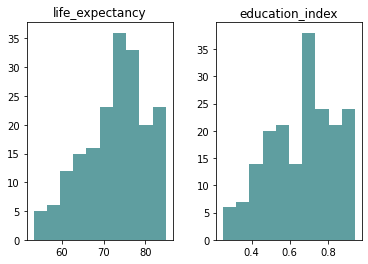

In [7]:
dataset.hist(grid = False, color = 'cadetblue')

Im Optimalfall sollten die beiden Variablen normalverteilt sein. Dafür müssen diese auf die Metriken Wölbung (kurtosis) und Schiefe (skew) untersucht werden. Zunächst wird die kurtosis des Bildungsindexes und der Lebenserwartung mithilfe der Funktion kurtosis mit der Fisher Methode berechnet. Danach wird die skew Funktion angewendet, um die Schiefe zu ermitteln. Anschließend werden alle Werte bis zur zweiten Nachkommastelle ausgegeben. 

Da die kurtosis Werte des Bildungsindexes -0,77 und der Lebenserwartun -0,39 betragen, liegen diese nah an dem Wert Null, wobei die beiden Variablen normalverteilt sind. 

Die skew Werte des Bildungsindexes und der Lebenserwartung betragen -0,34 und -0,56, bedeutet dies, dass die Verteilung vom Bildungsindex symmetrisch ist, aber die der Lebenserwartung fast symmetrisch ist.

In [28]:
# kurtosis berechnen mit Fisher-Methode. 
education_kurtosis = kurtosis(dataset['education_index'], fisher = True)
life_exp_kurtosis = kurtosis(dataset['life_expectancy'], fisher = True)

# skew berechnen 
education_skew = skew(dataset['education_index'])
life_exp_skew = skew(dataset['life_expectancy'])

display("Education Index Kurtosis beträgt {:.2}.".format(education_kurtosis)) 
display("Life Expectancy Kurtosis beträgt {:.2}.".format(life_exp_kurtosis))    

display("Education Index Skew beträgt {:.2}.".format(education_skew))         
display("Life Expectancy Skew beträgt {:.2}.".format(life_exp_skew))

'Education Index Kurtosis beträgt -0.77.'

'Life Expectancy Kurtosis beträgt -0.39.'

'Education Index Skew beträgt -0.34.'

'Life Expectancy Skew beträgt -0.56.'

### 2.3 Korrelation

Vor dem Erstellen des Streudiagramms sollen die x- und y-Achsen definiert werden. Für die Werte der x-Achse wird die Einflussvariable "education_index" gewählt, während für die Werte der y-Achse die Zielvariable "life_expectancy" gewählt wird. 
Im zweiten Teil des Codes wird mit der Bibliothek matplotlib das Streudiagramm erstellt. Das Attribut "o" sorgt dafür, dass die Darstellung der Werte im Diagramm als Punkte erfolgt; jeder Punkt repräsentiert ein Land. Hinzukommt, dass die Punkte im Code die Farbe "cadetblue" zugewiesen bekommen haben. 
Im letzten Teil des Codes bekommt das Streudiagramm mit der title-Methode eine Beschriftung ("Bildungsindex vs. Lebenserwartung"), sowie die Achsenbeschriftungen (x-Achse = "Bildungsindex" und y-Achse = "Lebenserwartung"). Mittels plt.show() wird das gesamte Streudiagramm dargestellt. 

Die Werte des unten abgebildeten Streudiagramms positiv verstreut; dies bedeutet, dass je höher der Bildungsindex ist, desto größer ist die jeweilige Lebenserwartung. Um sicherzustellen, dass die Hypothese der Wahrheit entspricht, wird der Korrelationskoeffizient benötigt. 

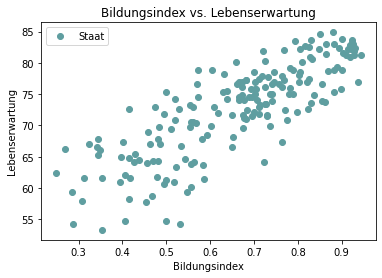

In [9]:
x = dataset['education_index']
y = dataset['life_expectancy']

plt.plot(x, y, 'o', color ='cadetblue', label = 'Staat')

plt.title("Bildungsindex vs. Lebenserwartung")
plt.xlabel("Bildungsindex")
plt.ylabel("Lebenserwartung")
plt.legend()

plt.show()

Der Korrelationskoeffizient wird unten ausgegeben; der Koeffizient wird entweder in der ersten Zeile und zweiten Spalte oder in der zweiten Zeile und ersten Spalte abgelesen. Dieser beträgt 0,81382 (81,382%) und ist somit größer als 0,8 was widerum darauf hindeutet, dass ein stark positiver Zusammenhang zwischen beiden Variablen besteht. 

In [ ]:
dataset.corr() 

,life_expectancy,education_index
life_expectancy,1.000000,0.818382
education_index,0.818382,1.000000


## 3 Machine Learning

### 3.1 Modellentwicklung

In diesem Teil wird ein Lineares Regressionsmodell entwickelt, welches aus zwei Datensätze (Trainings- und Testdatensatz) bestehen soll. Der Trainingsdatensatz wird benötigt, um den Computer darauf zu programmieren, den Zusammenhang zwischen der Lebenserwartung und dem Bildungsindex zu erkennen. Der Testdatendatz widerum prüft, inwiefern der Computer diesen Zusammenhang versteht. 

Um ein Modell zu entwickeln, werden zunächst die x- und y-Variablen definiert. Hierbei ist die x-Variable der Bildungsindex, weil es eine Einflussvariable ist, und die y-Varibale die Lebenserwartung, da diese die Zeilvariable ist, welche von Einflussvariable abhängig ist. Da jeweils zwei x- und y-Werte für den Datensatz erstellt werden, werden anschließend vier Datensätze (für x und y jeweils einmal die Zuweisung des Trainings- und Testdatensatzes) codiert. Ermöglicht wird dies mit der Funktion "train_test_split" aus der Bibliothek sklearn. Bei dieser Funktion werden die x- und y-Werte entgegengenommen, dabei betragen die Proportionen zwischen dem Trainingsdatensatz 65% und dem Testdatensatz 35% des gesamten Datensatzes. 

In [12]:
# definiere die x- und y-Variable. 
X = dataset.drop('life_expectancy', axis = 1)
Y = dataset[['life_expectancy']]

# Erstelle den Trainings- und Testdatensatz. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35)

Nachdem der Datensatz in zwei Teilen getrennt wurde, wird das Modell "LinearRegression()" aus derselben Bibliothek sklearn angewendet und hinterher mittels .fit() optimiert. Das Modell enthält die x- sowie y- Trainingsdatensätze.

In [39]:
# erstelle ein Modell zur Linearen Regression als Objekt.
lin_reg_modell = LinearRegression()

# Übergebe den Trainingsdatensatz an das Modell.
lin_reg_modell.fit(X_train, y_train)

LinearRegression()

Die Formel der Regression sieht wie folgt aus: y = β0 + β1*x . Die y- und x-Werte sind bereits im Trainingsdatensatz abgebildet, allerdings sind der y-Achsenabschnitt (Intercept oder Beta 0) und die Steigung (Koeffizient oder Beta 1) unbekannt. Beide Ausdrücke werden mit ".intercept_" und "coef_" berechnet. Intercept ist in diesem Fall ca. 50,36 und der Koeffizient 34. 

In [40]:
intercept = lin_reg_modell.intercept_[0]
coefficient = lin_reg_modell.coef_[0][0]

print("Der y-Achsenabschnitt der Regressionsgeraden liegt bei {:.4}.".format(intercept))
print("Die Steigung der Regressionsgeraden liegt bei {:.2}.".format(coefficient))

Der y-Achsenabschnitt der Regressionsgeraden liegt bei 50.36.
Die Steigung der Regressionsgeraden liegt bei 3.4e+01.


### 3.2 Modell Anwendung

Das Modell wird erstmal auf ein bestimmes Land getestet, welches zufällig aus dem Testdatensatz gewählt wird. Ausgewählt wurde das Land Dänemark mit dem Bildungsindex 0,92 und der Lebenserwartung 80,9. Mithilfe von ".predict()" wird die Lebenserwartung unter der Angabe des Bildungsindex ausgerechnet. Der hervorgesagte Wert beträgt 81.46 Jahre. Somit ist das Modell nah an dem Wahrheitswert. Dennoch muss der gesamte Testdatensatz untersucht werden.

In [41]:
prediction = lin_reg_modell.predict([[0.92]])
predicted_value = prediction[0][0]
print("Der vorhergesagte Wert für die mittlere Lebenserwartung in Dänemark lautet {:.4}.".format(predicted_value))

Der vorhergesagte Wert für die mittlere Lebenserwartung in Dänemark lautet 81.46.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### 3.3 Evaluation des Modells

In dieser Zelle wird mit der Evaluation begonnen. Aus der bestehenden x-Spalte wird zunächst eine neue Spalte mit der Beschriftung "X2" erstellt. Diese Spalte bildet gemeinsam mit der y-Spalte ein neues Modell, welches durch die Methode ".OLS()" entwickelt wird. Anschließend wird das neue Modell optimiert. 

In [42]:
# definiere den input.
X1 = sm.add_constant(X)

# erstelle OLS modell.
modell = sm.OLS(Y, X1)

# optimiere den Datensatz.
modell_opt = modell.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Um zu schauen, inwiefern ein Intervallunterschied bei dem y-Achsenabschnitt und der Steigung vorhanden ist, wird mit dem 95%-Konfidenzintervall gerechnet. Die passende Methode hierzu ist ".conf_int()". Die Intervalle zeigen an, dass die Intercept sich zwischen 37,38 und 52,19 variieren kann, während der Koeffizient sich zwischen 31,18 und 38,20 befindet. 

In [43]:
# berechne einen 95%-Konfidenzintervall.
modell_opt.conf_int()

,0,1
const,47.380394,52.184602
education_index,31.175849,38.204095


Anhand der p-Werte wird deutlich, ob die zwei Parameter ungleich Null sind. Hierfür werden zwei Hypothesen formuliert: 
1.   Nullhypothese: Intercept = 0 bzw. Koeffizient = 0
2.   Alternativhypothese Intercept ≠ 0 bzw. Koeffizient ≠ 0.

Um die Nullhypothese abzulehnen, muss der p-Wert kleiner als 5% sein. Da dies bei beiden Parametern zutrifft, wird die Nullhypothese abgelehnt. Somit sind sowohl die Steigung als auch der y-Achsenabschnitt ungleich Null. 


In [44]:
modell_opt.pvalues

const              3.457609e-95
education_index    7.299090e-47
dtype: float64

Für die Evaluation werden die drei Bewertungsmetriken MSE (Mean Squared Error), MAE (Mean Absolute Error) und RMSE (Root Mean Squared Error) herangezogen. Mit Hilfe der ".predict()" Methode werden alle y-Werte des Testdatensatzes vorhergesagt. Darauffolgend werden MSE und MAE mittels "mean_squared_error" und "mean_absolute_error" Funktionen berechnet. Um den RMSE zu berechnen, wird die zu der Bibliothek "math" gehörende Wurzelfunktion "math.sqrt()" an den MSE Wert angewendet. 

Als Resultat wird 20,3 für MSE, 3,67 für MAE und 4,51 für RMSE ausgegeben. Das deutet darauf hin, dass laut dem Ergebnis des MAE das entwickelte Modell optimal ist, laut MSE und RMSE allerdings verbesserungsfähig ist. 

In [45]:
y_predict = lin_reg_modell.predict(X_test)
# berechne den MSE.
modell_mse = mean_squared_error(y_test, y_predict)

# berechne den MAE.
modell_mae = mean_absolute_error(y_test, y_predict)

# berechne RMSE. 
modell_rmse =  math.sqrt(modell_mse)

# zeige Ausgabe.
print("MSE: {:.3}".format(modell_mse))
print("MAE: {:.3}".format(modell_mae))
print("RMSE: {:.3}".format(modell_rmse))

MSE: 20.3
MAE: 3.67
RMSE: 4.51


Als letzter Schritt zur Evaluation des Modells wird der Wert des R-Quadrats verwendet. Die Funktion "r2_score" wird an vorhergesagte und Wahre y-Werte des Testdatensatzes angewendet und gibt den Wert 0,64 aus. Laut der Faust-Regel ist jedes Modell optimal, wenn der R-Quadrat Wert größer gleich 0,71. 

In [46]:
modell_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(modell_r2))

R2: 0.71


Mit der Methode ".summary()" werden alle relevanten Informationen zu der Regression dargestellt. In der Ausgabe beziehungsweise der Zusammenfassung werden nochmals die Steigung und der y-Achsenabschnitt ausgegeben. Der p-Wert ist hierbei bei beiden Parametern Null und der 95%-KI besitzt die selben Werte wie zuvor. 

In der oberen rechten Hälfte der Ausgabe befindet sich R-Quadrat mit dem Wert 0,67. Der Wert dieser Zusammenfassung unterscheidet sich von dem zuvor ausgerechneten Wert (0,71). 

In [47]:
print(modell_opt.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     379.2
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.30e-47
Time:                        16:10:54   Log-Likelihood:                -540.91
No. Observations:                 189   AIC:                             1086.
Df Residuals:                     187   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              49.7825      1.218     

Um die Genauigkeit des Modells weiter zu prüfen, müssen die Risiduen (Differenz zwischen den wahren und den vorhergesagten y-Werten des Testdatensatzes) näher betrachtet werden. Diese müssen im Optimalfall normal verteilt sein. Bei der Darstellung des Histogramms soll die ".hist()" Methode für die Differenz beider y-Werte verwendet werden. Das Histogramm bekommt die Beschriftung "Verteilung der Residuen" und wird anschließend mit dem Befehl "plt.show()" angezeigt.  

Aus der Abbildung lässt sich entnehmen, dass die Verteilung der Risiduen der Normalverteilung ähnelt. 

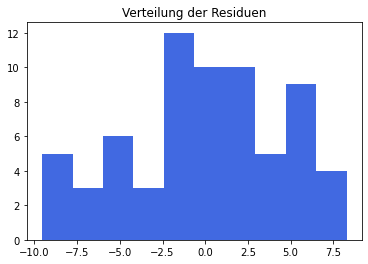

In [48]:
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Verteilung der Residuen")
plt.show()

Zum Schluss wird die Lineare Regression für den Testdatensatz genutzt. Hierfür wird ein Streudiagramm mit den grauen Punkten als einzelne Länder erstellt. Außerdem wird mittels ".plot()" Methode eine Regressionsgerade in der Farbe "royalblue" mit einer Breite von 3px codiert. Daraufhin werden das gesamte Streudiagramm ("Bildungsindex vs. Lebenserwartung") mit den jeweiligen Achsen (x-Achse = Bildungsindex, y-Achse = Lebenserwartung) benannt. 

Die Regressionsfunktion verläuft mittig von den einzelnen Punkten und durchkreuzt einige dieser Werte. Dennoch sind viele Punkte weit von der Regressionsgerade distanziert. 

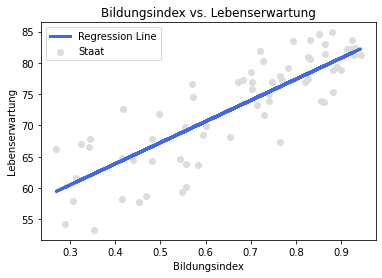

In [49]:
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Staat')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Bildungsindex vs. Lebenserwartung")
plt.xlabel("Bildungsindex")
plt.ylabel("Lebenserwartung")
plt.legend()
plt.show()



### 3.4 Speichern des Modells

Damit die mehrfach wiederholte Nutzung der Daten aus den Datensätzen mit dem selben Modell effizienter verläuft und die selben Resultate ausgibt, muss das Modell zunächst gespeichert werden. 

Die Bibliothek Pickle wird importiert, um das vorhandene Modell für die fortlaufende Nutzung mit weiteren Daten zu speichern; zuständig hierfür ist die ".dump()"-Methode der Bibliothek. Daraufhin müssen die Daten mithilfe der ".load()"-Methode erneut in das Notebook geladen werden. Abschließend wird eine neue Vorhersage zu Dänemark mittels ".predict()" entworfen. Der vorhergesagte Wert stimmt mit dem zuvor ausgegebenen Wert überein. 

In [51]:
import pickle

# speichere das Modell.
with open('linear_regression.sav','wb') as speichern:
     pickle.dump(lin_reg_modell,speichern)

# Lade die Daten erneut.
with open('linear_regression.sav', 'rb') as altes_modell:
     lin_reg_modell_1 = pickle.load(altes_modell)

# Erstelle eine neue Vorhersage.
lin_reg_modell_1.predict([[0.92]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[81.45635961]])

# 4 Fazit

Zusammenfassend lässt sich sagen, dass der Datensatz die Anforderungen für die Anwendung einer Linearen Regression erfüllt. Da die Regressionsgerade eine positive Steigung hat, deutet es darauf hin, dass in Staaten beziehungsweise Ländern mit einem höheren Bildungsindex, die Lebenserwartung ebenfalls höher ist.  Zudem schätzt das entwickelte Modell die Lebenserwartungen von den Staaten/Ländern mit einem höheren (ab 0,65) Bildungsindex ungefähr Realitätsgetreu. Dennoch sagt das Modell bei Staaten mit einem niedrigeren Bildungsindex falsche Lebenserwartungen hervor. 

# 5 Quellen


Quellen zum Datensatz:
*   Wikipedia (o. J.): Education Index. Online unter https://en.wikipedia.org/wiki/Education_Index#:~:text=An%20Education%20index%20is%20a%20component%20of%20the,GDP%20per%20capita%20and%20life%20expectancy%20of%20countries. [Abruf am 11.07.2022]
*   Human Development Reports (2020): Human Development Index (HDI). Online unter https://hdr.undp.org/data-center/human-development-index#/indicies/HDI [Abruf am 11.07.2022]
*   Human Development Reports (2020): 2020_Statistical_Annex_Table_1. Online unter https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fhdr.undp.org%2Fsites%2Fdefault%2Ffiles%2Fdata%2F2020%2F2020_Statistical_Annex_Table_1.xlsx&wdOrigin=BROWSELINK [Abruf am 11.07.2022]

Quelle zu den Codes:
*   Sigma Coding (2019):Liner Regression Model Tutorial. Online unter https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/simple-linear-regression/Linear%20Regression%20Model.ipynb [Abruf am 11.07.2022]
*   Chugh, Akshita (2020): MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better? Online unter https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e [Abruf am 11.07.2022]






